In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams

In [3]:
df = pd.read_csv("TSd1.csv", index_col = 0)
df

,IPG2211A2N
DATE,
1/1/1939,3.3842
2/1/1939,3.4100
3/1/1939,3.4875
4/1/1939,3.5133
5/1/1939,3.5133
6/1/1939,3.5650
7/1/1939,3.5650
8/1/1939,3.6167
9/1/1939,3.7200


In [4]:
df.columns

Index(['IPG2211A2N'], dtype='object')

In [5]:
df.index

Index(['1/1/1939', '2/1/1939', '3/1/1939', '4/1/1939', '5/1/1939', '6/1/1939',
       '7/1/1939', '8/1/1939', '9/1/1939', '10/1/1939',
       ...
       '6/1/2018', '7/1/2018', '8/1/2018', '9/1/2018', '10/1/2018',
       '11/1/2018', '12/1/2018', '1/1/2019', '2/1/2019', '3/1/2019'],
      dtype='object', name='DATE', length=963)

In [6]:
df[pd.isnull(df['IPG2211A2N'])]

,IPG2211A2N
DATE,


In [7]:
df.columns = ['Energy Production']

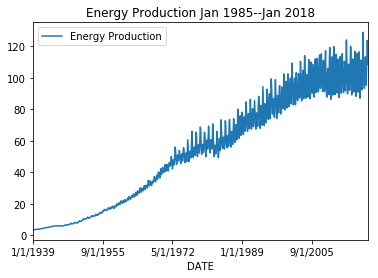

In [8]:
df.plot(title="Energy Production Jan 1985--Jan 2018")

In [ ]:
#Building a model using ARIMA 
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, out_of_sample_size = 10)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3797.945, BIC=3822.227, Fit time=9.106 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4314.379, BIC=4324.092, Fit time=0.425 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4147.767, BIC=4167.193, Fit time=2.890 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3918.011, BIC=3937.437, Fit time=3.427 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3796.633, BIC=3825.772, Fit time=11.208 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3984.504, BIC=4008.786, Fit time=4.760 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3788.135, BIC=3822.130, Fit time=28.428 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3909.676, BIC=3938.815, Fit time=10.942 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3783.295, BIC=3822.147, Fit time=33.324 seconds
Fit ARIMA: order=(2, 1, 

In [8]:
#stepwise_model.aic()
#We want a lower AIC value

In [9]:
df.info()
stepwise_model

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 1/1/1939 to 3/1/2019
Data columns (total 1 columns):
Energy Production    963 non-null float64
dtypes: float64(1)
memory usage: 15.0+ KB


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 2),
   out_of_sample_size=10, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [10]:
#Splitting up the test/train data 
train = df.loc['1/1/1985':'12/1/2016']
train.tail()
test = df.loc['1/1/2015':]
test.tail()
len(test)
len(train)

384

In [11]:
#fitting the model with the training data
stepwise_model.fit(train)
tr = stepwise_model.fit(train)

In [12]:
#forecasting for future dates
future_forecast = stepwise_model.predict(n_periods = len(test))

In [42]:
future_forecast2 = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
future_forecast.head()

,Prediction
DATE,
1/1/2015,121.678929
2/1/2015,109.568805
3/1/2015,99.858418
4/1/2015,89.672734
5/1/2015,91.406997


In [14]:
test.head()

,Energy Production
DATE,
1/1/2015,119.9317
2/1/2015,116.1393
3/1/2015,104.0218
4/1/2015,89.1544
5/1/2015,90.6950


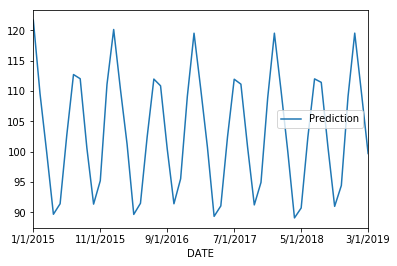

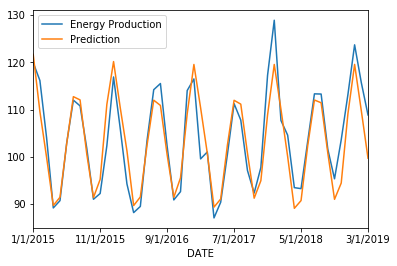

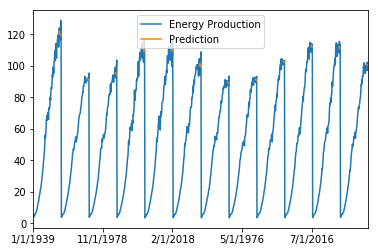

In [20]:
future_forecast.plot()
pdf = pd.concat([test,future_forecast],axis=1)
pdf.plot()
pdf2 = pd.concat([df, future_forecast], axis = 1, sort = 'False')
pdf2.plot()

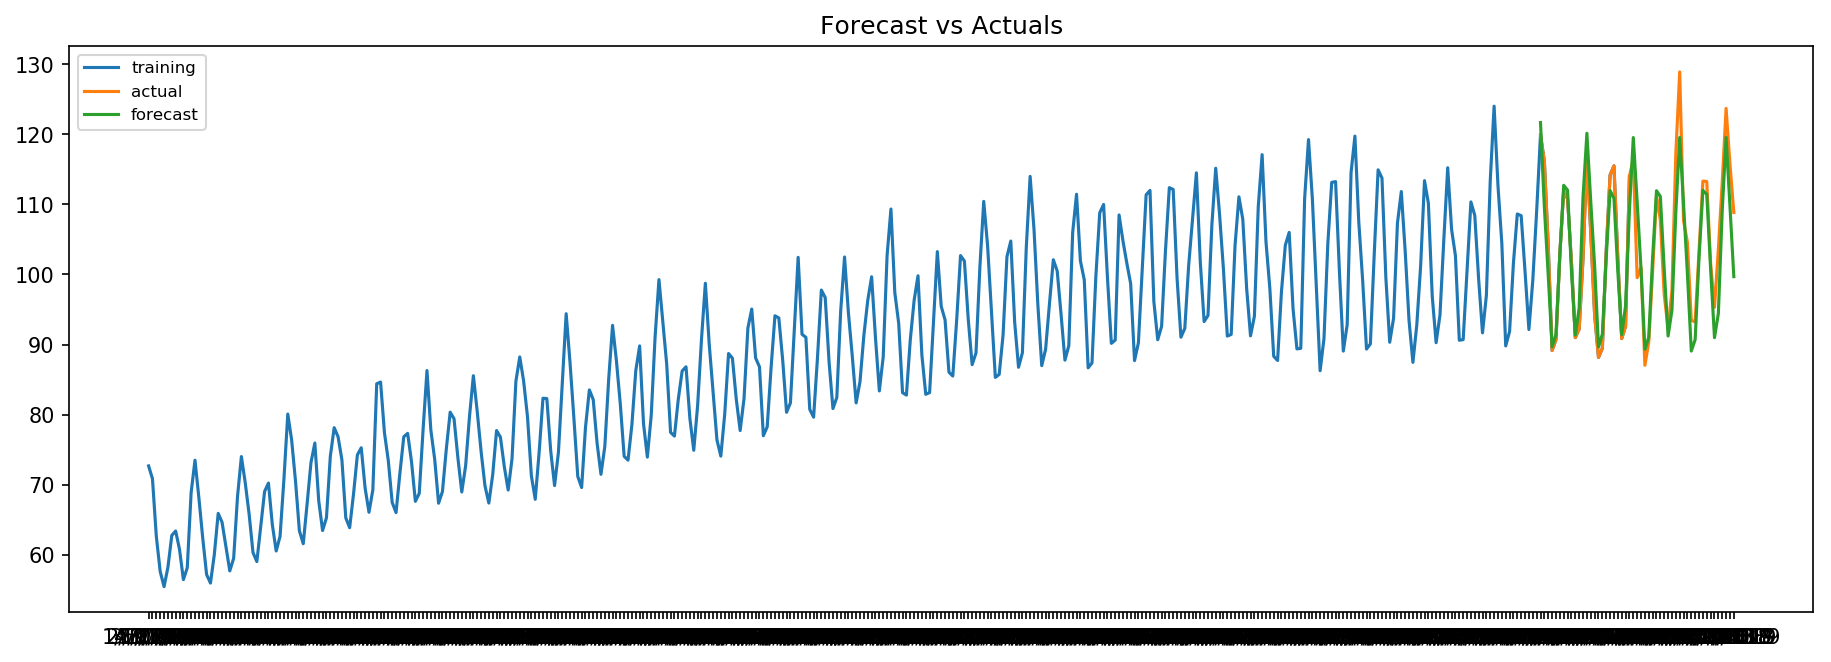

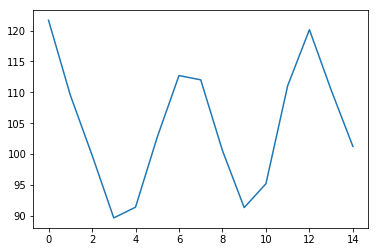

In [88]:
plt.figure(figsize=(15,5), dpi=150)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(future_forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
graph = tr.predict(15)
plt.plot(graph)


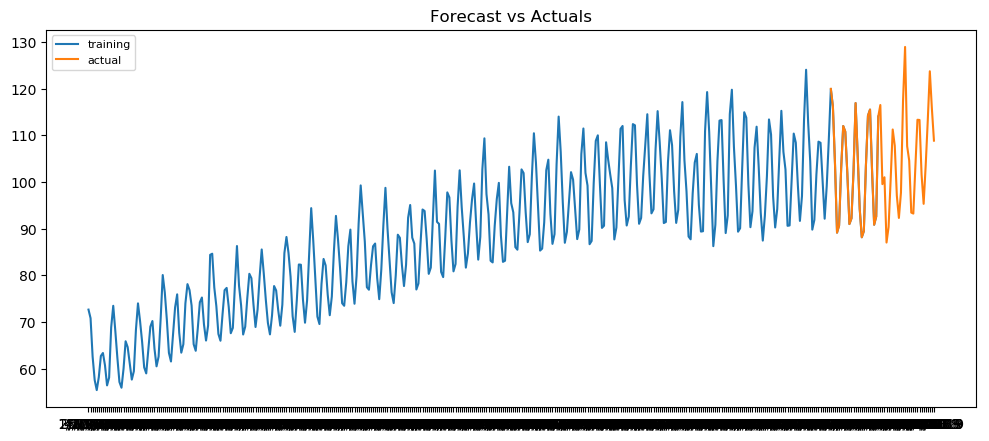

,0
0,121.678929
1,109.568805
2,99.858418
3,89.672734
4,91.406997
5,102.749862
6,112.722513
7,112.030395
8,100.576409
9,91.347004


In [100]:
fitted = stepwise_model.fit(train)  
#future_forecast = stepwise_model.predict(n_periods = len(test))
# Forecast
fc = fitted.predict(n_periods = len(test))  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(index=test.index)
upper_series = pd.Series(index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
#plt.plot(graph, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='b', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
graph2 = pd.DataFrame(graph)
graph2